In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [66]:
df=pd.read_csv('data/supplier_chain_processing.csv')

In [67]:
df

,Type,Customer Segment,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Shipping Mode,Disruption_Risk,Shipping_Delay_Days
0,DEBIT,Consumer,Pacific Asia,0.04,327.750000,1,327.750000,91.250000,Southeast Asia,Standard Class,1,-1
1,TRANSFER,Consumer,Pacific Asia,0.05,327.750000,1,327.750000,-249.089996,South Asia,Standard Class,2,1
2,CASH,Consumer,Pacific Asia,0.06,327.750000,1,327.750000,-247.779999,South Asia,Standard Class,1,0
3,DEBIT,Home Office,Pacific Asia,0.07,327.750000,1,327.750000,22.860001,Oceania,Standard Class,1,-1
4,PAYMENT,Corporate,Pacific Asia,0.09,327.750000,1,327.750000,134.210007,Oceania,Standard Class,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Home Office,Pacific Asia,0.00,399.980011,1,399.980011,40.000000,Eastern Asia,Standard Class,1,0
180515,DEBIT,Corporate,Pacific Asia,0.01,399.980011,1,399.980011,-613.770019,Eastern Asia,Second Class,2,1
180516,TRANSFER,Corporate,Pacific Asia,0.02,399.980011,1,399.980011,141.110001,Oceania,Standard Class,2,1
180517,PAYMENT,Consumer,Pacific Asia,0.03,399.980011,1,399.980011,186.229996,Oceania,Standard Class,1,-1


In [68]:
df.shape

(180519, 12)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Customer Segment          180519 non-null  object 
 2   Market                    180519 non-null  object 
 3   Order Item Discount Rate  180519 non-null  float64
 4   Order Item Product Price  180519 non-null  float64
 5   Order Item Quantity       180519 non-null  int64  
 6   Sales                     180519 non-null  float64
 7   Order Profit Per Order    180519 non-null  float64
 8   Order Region              180519 non-null  object 
 9   Shipping Mode             180519 non-null  object 
 10  Disruption_Risk           180519 non-null  int64  
 11  Shipping_Delay_Days       180519 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 16.5+ MB


In [70]:
df['Order Item Quantity'].value_counts()

Order Item Quantity
1    99134
5    20385
3    20350
4    20335
2    20315
Name: count, dtype: int64

In [71]:
df['Shipping_Delay_Days'].value_counts()

Shipping_Delay_Days
 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: count, dtype: int64

In [72]:
df['Order Profit Per Order'].value_counts()

Order Profit Per Order
 0.000000      1177
 143.990005     199
 72.000000      194
 46.799999      188
 24.000000      181
               ... 
-212.410004       1
-18.959999        1
 177.169998       1
 130.979996       1
-196.179993       1
Name: count, Length: 21998, dtype: int64

In [73]:
df['Order Profit Per Order'].round(2)

0          91.25
1        -249.09
2        -247.78
3          22.86
4         134.21
           ...  
180514     40.00
180515   -613.77
180516    141.11
180517    186.23
180518    168.95
Name: Order Profit Per Order, Length: 180519, dtype: float64

In [74]:
df['Order Item Product Price'].value_counts()

Order Item Product Price
59.990002      24820
129.990005     22372
50.000000      21035
49.980000      19298
399.980011     17325
               ...  
349.989990        40
329.989990        27
599.989990        21
1999.989990       15
999.989990        10
Name: count, Length: 75, dtype: int64

In [75]:
df['Order Item Product Price'] = df['Order Item Product Price'].round(2)


In [76]:
df['Order Item Product Price'].value_counts()

Order Item Product Price
59.99      24820
129.99     22372
50.00      21035
49.98      19298
399.98     17325
           ...  
349.99        40
329.99        27
599.99        21
1999.99       15
999.99        10
Name: count, Length: 75, dtype: int64

Univariate analysis for numerical column


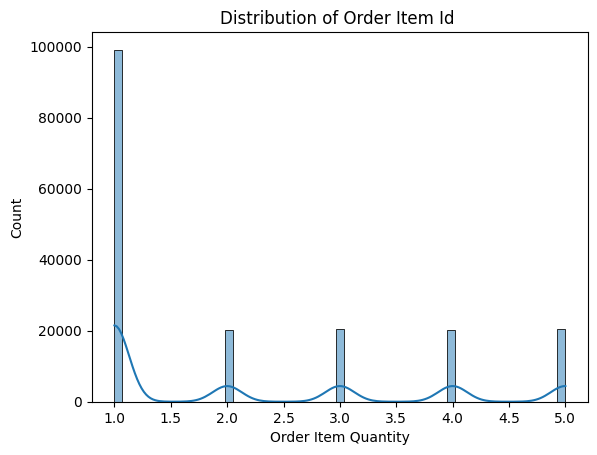

In [77]:
#histogram for order item id

sns.histplot(df['Order Item Quantity'],kde=True)
plt.title("Distribution of Order Item Id ")
plt.show()

# calculate the mean and median


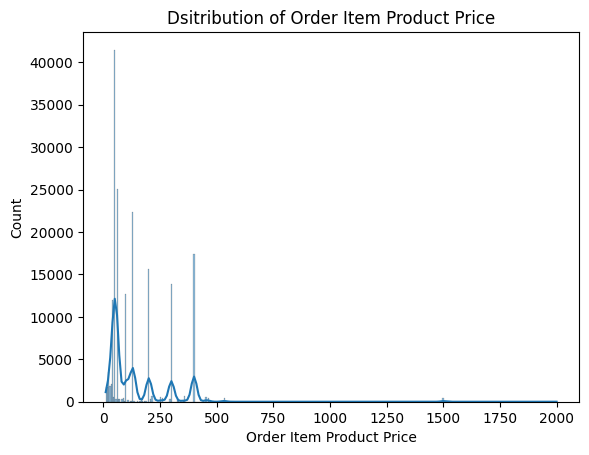

MEAN : 141.23254654634692
Median : 59.99


In [78]:
sns.histplot(df['Order Item Product Price'],kde=True)
plt.title("Dsitribution of Order Item Product Price")
plt.show()

# calculate mean and median 

Order_Item_Product_Price_mean=df['Order Item Product Price'].mean() 
Order_Item_Product_Price_median=df['Order Item Product Price'].median() 

print("MEAN :",Order_Item_Product_Price_mean)
print("Median :",Order_Item_Product_Price_median)


In [79]:
Q1 = df['Order Item Product Price'].quantile(0.25)
Q3 = df['Order Item Product Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-174.985), np.float64(424.975))

In [80]:
((df['Order Item Product Price'] < lower) | 
 (df['Order Item Product Price'] > upper)).sum()


np.int64(2048)

In [81]:
df['Order Item Product Price'] = df['Order Item Product Price'].clip(lower, upper)


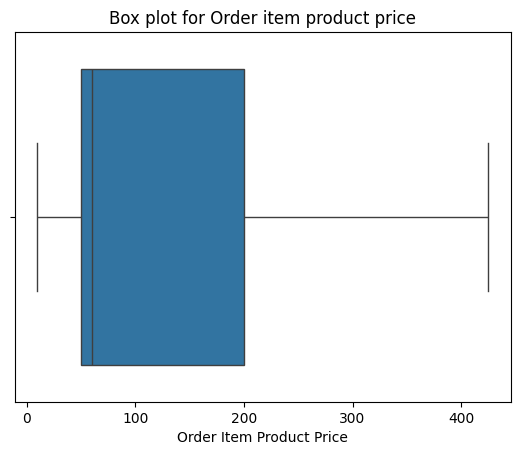

In [82]:
sns.boxplot(x=df['Order Item Product Price'])
plt.title('Box plot for Order item product price')
plt.show()

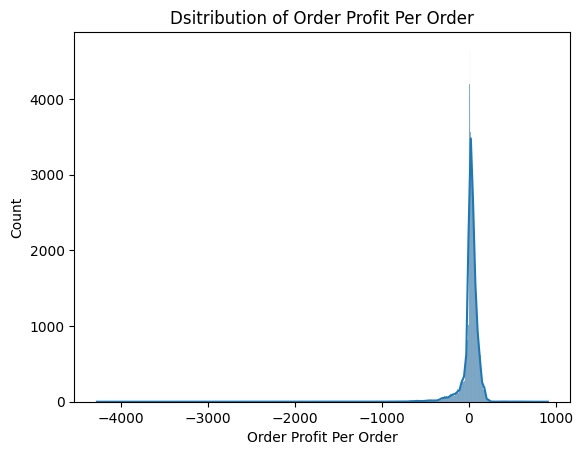

MEAN : 21.97498863859404
Median : 31.52000046


In [83]:
sns.histplot(df['Order Profit Per Order'],kde=True)
plt.title("Dsitribution of Order Profit Per Order")
plt.show()

# calculate mean and median 

Order_Profit_Per_Order_mean=df['Order Profit Per Order'].mean() 
Order_Profit_Per_Order_median=df['Order Profit Per Order'].median() 

print("MEAN :",Order_Profit_Per_Order_mean)
print("Median :",Order_Profit_Per_Order_median)


In [84]:
Q1 = df['Order Profit Per Order'].quantile(0.25)
Q3 = df['Order Profit Per Order'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-79.70000457500001), np.float64(151.50000762500002))

In [85]:
((df['Order Profit Per Order'] < lower) | 
 (df['Order Profit Per Order'] > upper)).sum()

np.int64(18942)

In [86]:
df['Order Profit Per Order'] = df['Order Profit Per Order'].clip(lower, upper)


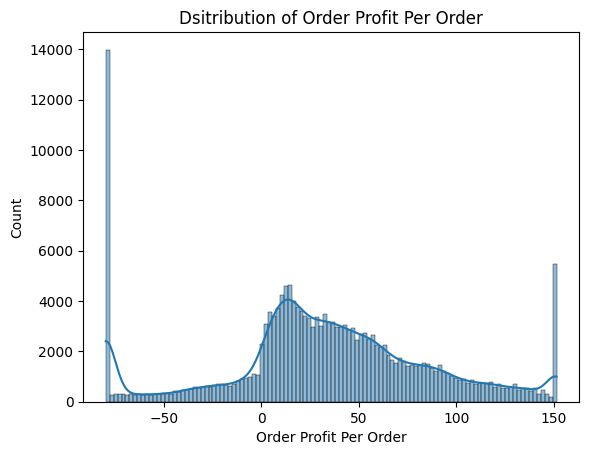

In [87]:
sns.histplot(df['Order Profit Per Order'],kde=True)
plt.title("Dsitribution of Order Profit Per Order")
plt.show()


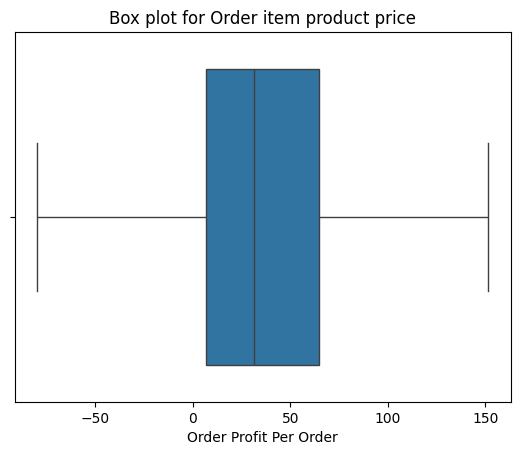

In [88]:
sns.boxplot(x=df['Order Profit Per Order'])
plt.title('Box plot for Order item product price')
plt.show()

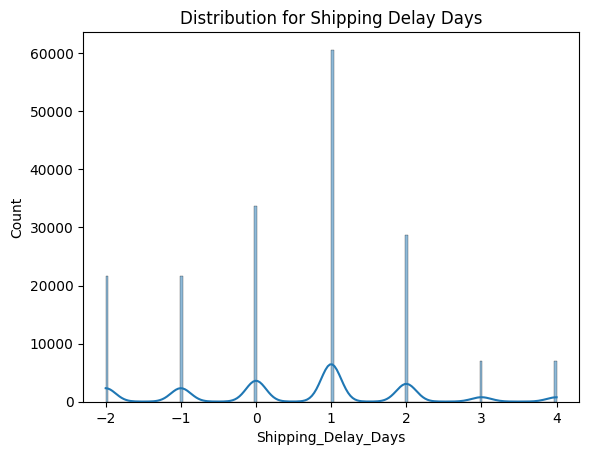

Mean: 0.5658074773292562
Median: 1.0


In [89]:
sns.histplot(df['Shipping_Delay_Days'],kde=True)
plt.title('Distribution for Shipping Delay Days')
plt.show()

Shipping_Delay_Days_mean=df['Shipping_Delay_Days'].mean()
Shipping_Delay_Days_median=df['Shipping_Delay_Days'].median()

print('Mean:', Shipping_Delay_Days_mean)
print('Median:',Shipping_Delay_Days_median)


In [90]:
Q1=df['Shipping_Delay_Days'].quantile(0.25)
Q3=df['Shipping_Delay_Days'].quantile(0.75)
IQR=Q3-Q1

lower=Q1 - 1.5*IQR
upper= Q3 + 1.5*IQR

lower,upper

(np.float64(-1.5), np.float64(2.5))

In [91]:
((df['Shipping_Delay_Days']<lower)| (df['Shipping_Delay_Days']>upper)).sum()

np.int64(35701)

In [92]:
df['Shipping_Delay_Days']=df['Shipping_Delay_Days'].clip(lower,upper)

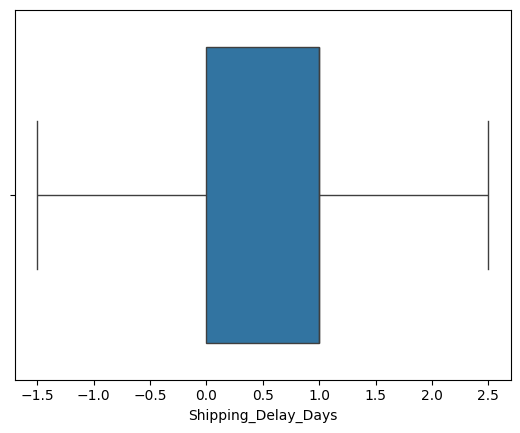

In [93]:
sns.boxplot(x=df['Shipping_Delay_Days'])
plt.show()

In [94]:
df.isnull().sum()

Type                        0
Customer Segment            0
Market                      0
Order Item Discount Rate    0
Order Item Product Price    0
Order Item Quantity         0
Sales                       0
Order Profit Per Order      0
Order Region                0
Shipping Mode               0
Disruption_Risk             0
Shipping_Delay_Days         0
dtype: int64

In [95]:
df.shape

(180519, 12)

In [96]:
print(df.columns.tolist())


['Type', 'Customer Segment', 'Market', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Sales', 'Order Profit Per Order', 'Order Region', 'Shipping Mode', 'Disruption_Risk', 'Shipping_Delay_Days']


In [97]:
for col in df.columns:
    print(col)


Type
Customer Segment
Market
Order Item Discount Rate
Order Item Product Price
Order Item Quantity
Sales
Order Profit Per Order
Order Region
Shipping Mode
Disruption_Risk
Shipping_Delay_Days


Label Encoding

In [98]:
object_columns=df.select_dtypes(include=['object']).columns

In [99]:
print(object_columns)

Index(['Type', 'Customer Segment', 'Market', 'Order Region', 'Shipping Mode'], dtype='object')


In [100]:
import pickle

In [101]:

    
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder  # saving the encoder for this column
    
# save the encoders as a pickle file

with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [102]:
encoders

{'Type': LabelEncoder(),
 'Customer Segment': LabelEncoder(),
 'Market': LabelEncoder(),
 'Order Region': LabelEncoder(),
 'Shipping Mode': LabelEncoder()}

Bivariate analysis

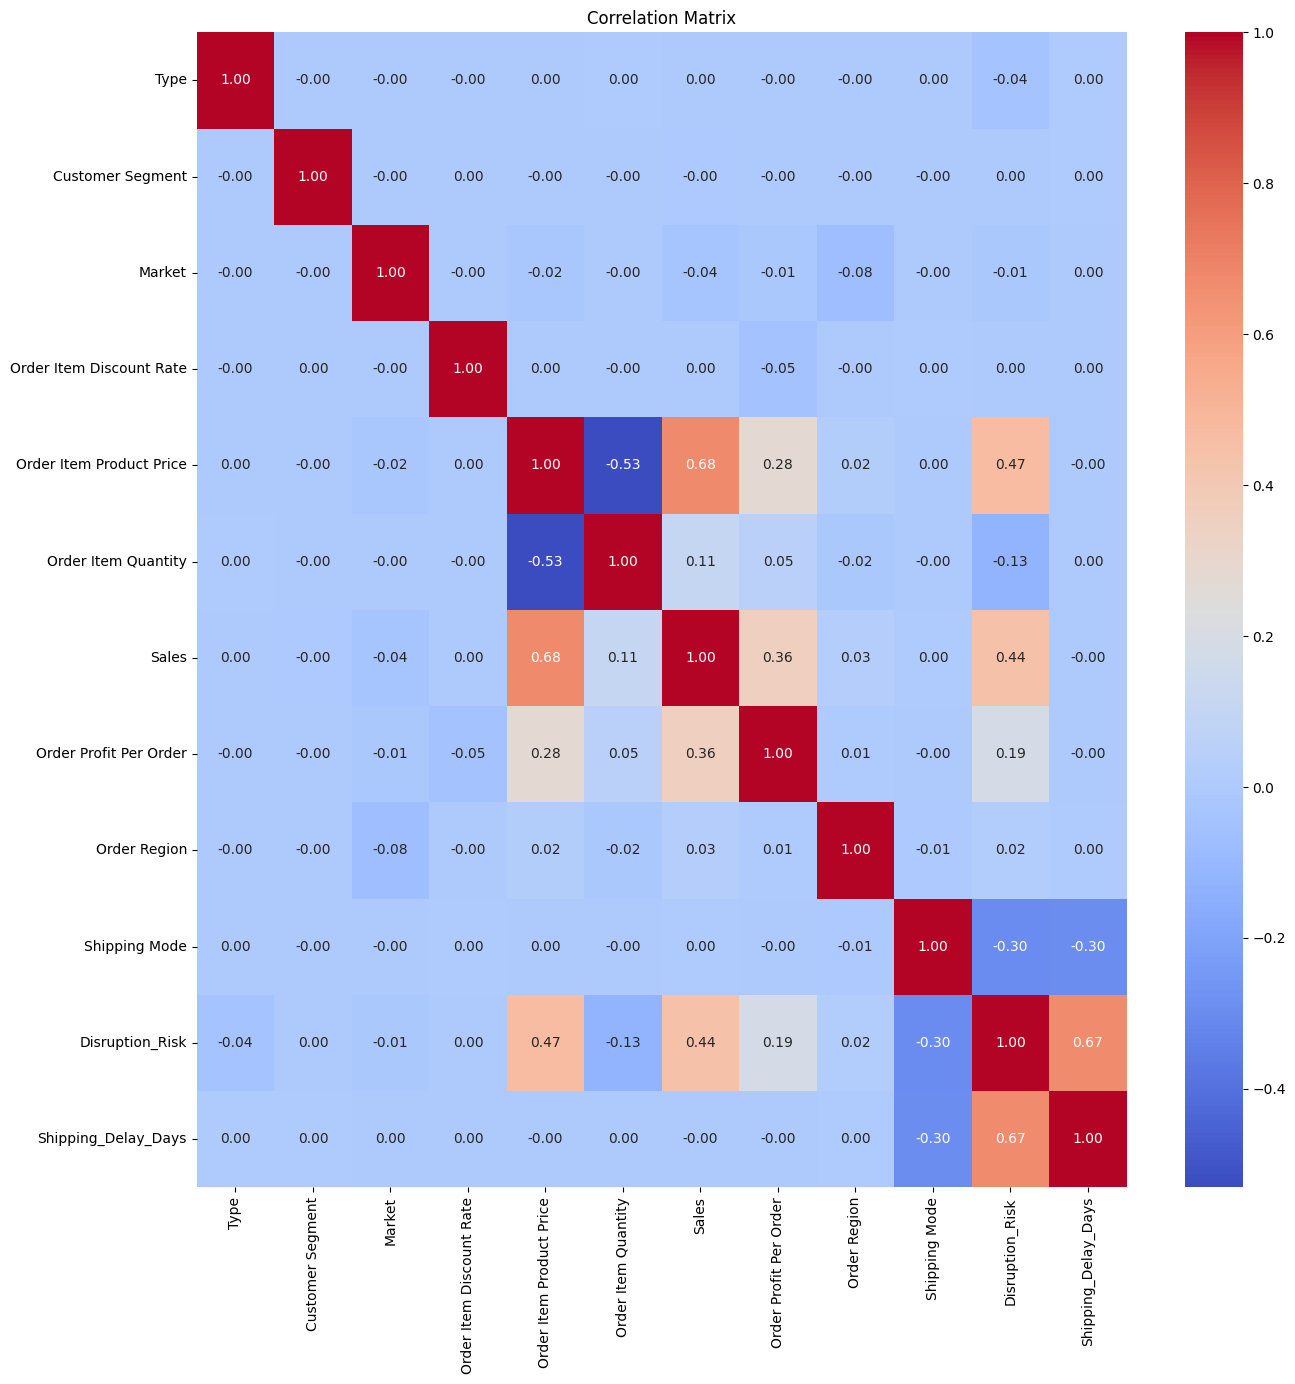

In [103]:
#correlation matrix


plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [104]:
# train test split

df.columns

Index(['Type', 'Customer Segment', 'Market', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Shipping Mode',
       'Disruption_Risk', 'Shipping_Delay_Days'],
      dtype='object')

In [105]:
X=df.drop(columns=['Disruption_Risk'])
Y=df['Disruption_Risk']

In [106]:
X

,Type,Customer Segment,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Shipping Mode,Shipping_Delay_Days
0,1,0,3,0.04,327.75,1,327.750000,91.250000,15,3,-1.0
1,3,0,3,0.05,327.75,1,327.750000,-79.700005,13,3,1.0
2,0,0,3,0.06,327.75,1,327.750000,-79.700005,13,3,0.0
3,1,2,3,0.07,327.75,1,327.750000,22.860001,11,3,-1.0
4,2,1,3,0.09,327.75,1,327.750000,134.210007,11,3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...
180514,0,2,3,0.00,399.98,1,399.980011,40.000000,7,3,0.0
180515,1,1,3,0.01,399.98,1,399.980011,-79.700005,7,2,1.0
180516,3,1,3,0.02,399.98,1,399.980011,141.110001,11,3,1.0
180517,2,0,3,0.03,399.98,1,399.980011,151.500008,11,3,-1.0


In [107]:
X.shape

(180519, 11)

In [108]:
print(X.columns)

Index(['Type', 'Customer Segment', 'Market', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Shipping Mode',
       'Shipping_Delay_Days'],
      dtype='object')


In [109]:
Y

0         1
1         2
2         1
3         1
4         1
         ..
180514    1
180515    2
180516    2
180517    1
180518    1
Name: Disruption_Risk, Length: 180519, dtype: int64

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [111]:
X_train.shape

(144415, 11)

In [112]:
Y_train.shape

(144415,)

In [113]:
print(X_train.columns.tolist())


['Type', 'Customer Segment', 'Market', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Sales', 'Order Profit Per Order', 'Order Region', 'Shipping Mode', 'Shipping_Delay_Days']


In [114]:
Y_train.value_counts()

Disruption_Risk
1    71967
0    49799
2    22649
Name: count, dtype: int64

In [115]:
Y_test.value_counts()

Disruption_Risk
1    17998
0    12354
2     5752
Name: count, dtype: int64

In [116]:
df.shape

(180519, 12)

MODEL TRAINING

In [117]:
models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Randon Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [118]:
# dictionary to store cross validation results

cv_scores={}

# perform cross validation for each model

for model_name, model in models.items():
    print(f'training{model_name} with default parameters...')
    scores=cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores
    print(f'{model_name} Cross Validation Accuracy:{np.mean(scores):.2f}')
    print('-'*50)

trainingDecision Tree with default parameters...
Decision Tree Cross Validation Accuracy:0.93
--------------------------------------------------
trainingRandon Forest with default parameters...
Randon Forest Cross Validation Accuracy:0.95
--------------------------------------------------
trainingXGBoost with default parameters...
XGBoost Cross Validation Accuracy:0.95
--------------------------------------------------


In [119]:
print(X.columns)

Index(['Type', 'Customer Segment', 'Market', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Region', 'Shipping Mode',
       'Shipping_Delay_Days'],
      dtype='object')


MODEL SELECTION AND Hyperparameter tuning

In [120]:
# Initialize models
decision_tree= DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)

In [121]:
final_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)


In [122]:
final_model.fit(X_train,Y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [123]:
Y_pred = final_model.predict(X_test)

print("Test Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Test Accuracy: 0.9492853977398626

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     12354
           1       0.93      0.97      0.95     17998
           2       0.90      0.88      0.89      5752

    accuracy                           0.95     36104
   macro avg       0.94      0.93      0.94     36104
weighted avg       0.95      0.95      0.95     36104



In [124]:
train_pred = final_model.predict(X_train)
test_pred  = final_model.predict(X_test)

train_acc = accuracy_score(Y_train, train_pred)
test_acc  = accuracy_score(Y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9632655887546308
Test Accuracy: 0.9492853977398626


Save the final model & encoders

In [125]:
# import pickle

# with open('final_model.pkl', 'wb') as f:
#     pickle.dump(final_model, f)

# with open('encoders.pkl', 'wb') as f:
#     pickle.dump(encoders, f)


In [127]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

categorical_cols = ['Type','Customer Segment','Market','Order Region','Shipping Mode']

numeric_cols = [
    'Order Item Discount Rate',
    'Order Item Product Price',
    'Order Item Quantity',
    'Sales',
    'Order Profit Per Order',
    'Shipping_Delay_Days'
]

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=50,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
])

pipeline.fit(X, Y)

import pickle
pickle.dump(pipeline, open("final_pipeline.pkl", "wb"))


In [128]:
import numpy as np

sample = X_test[0:20]
print(np.unique(final_model.predict(sample)))


[0 1 2]


In [129]:
X.describe()

,Type,Customer Segment,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Sales,Order Profit Per Order,Order Region,Shipping Mode,Shipping_Delay_Days
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,1.675137,0.660545,2.107346,0.101668,137.942126,2.127638,203.772096,32.846879,12.128978,2.234806,0.548261
std,0.994647,0.762408,1.150840,0.070415,120.633112,1.453451,132.273077,55.249799,6.983246,1.100920,1.244147
min,0.000000,0.000000,0.000000,0.000000,9.990000,1.000000,9.990000,-79.700005,0.000000,0.000000,-1.500000
25%,1.000000,0.000000,1.000000,0.040000,50.000000,1.000000,119.980003,7.000000,6.000000,2.000000,0.000000
50%,2.000000,0.000000,2.000000,0.100000,59.990000,1.000000,199.919998,31.520000,12.000000,3.000000,1.000000
75%,3.000000,1.000000,3.000000,0.160000,199.990000,3.000000,299.950012,64.800003,18.000000,3.000000,1.000000
max,3.000000,2.000000,4.000000,0.250000,424.975000,5.000000,1999.989990,151.500008,22.000000,3.000000,2.500000


In [130]:
pickle.dump(pipeline, open("final_pipeline.pkl", "wb"))
